# Single material point study

In [4]:
%matplotlib widget
import numpy as np
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

<img src="single point detail.png" width="700"/> 

In [5]:
dic_grid = DICGrid(n_x=2, n_y=2, d_x = 1, d_y = 1,  
                    start_t = 0, end_t = 4, U_factor = 1, dir_name='unit_beam_', grid_column_first = False, 
                    grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-1, y_ref_j_min=0, y_ref_j_max=1)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 0, n_x_max = 1, n_x_step=1, n_y_min = 0, n_y_max = 2, n_y_step = 1)

In [6]:
dic_grid.interact()

In [8]:
dic_aligned_grid.interact()

In [9]:
dic_cor.interact()

In [10]:
import numpy as np
end_t_arr = np.arange(1,5,1)
phi_arr = []
for end_t in end_t_arr[::1]:
    print('evaluating step', end_t)

    dic_grid.end_t = end_t

    # selected points for rotation
    XU_ija = dic_cor.dic_aligned_grid.rot_Xu_ija # check the refence system and verify
    XU_ija_sel = (XU_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                         dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
    XU_pr = XU_ija_sel.reshape(-1, 2)

    dic_cor.dic_grid.X_ija
    # selection of grid of points
    X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                       dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
    X_pr = X_ija_sel.reshape(-1, 2)

    # evaluating distances using distance formula
    X_cor_r = dic_cor.X_cor
    XU_mid_pr = (XU_pr + X_pr) / 2

    V_X_XU_mid_pr = X_cor_r[np.newaxis, :] - XU_mid_pr
    V_XU_XU_mid_pr = XU_pr - XU_mid_pr

    len_d_0c = np.sqrt(np.einsum('...i,...i->...', V_X_XU_mid_pr, V_X_XU_mid_pr ))
    len_d_0t = np.sqrt(np.einsum('...i,...i->...', V_XU_XU_mid_pr, V_XU_XU_mid_pr ))

    phi = 2*np.arctan(len_d_0t/len_d_0c)
    phi_avg = np.average(phi)
    phi_arr.append(phi_avg)

    print('phi_avg', phi_avg * 180 / np.pi)

evaluating step 1
phi_avg 9.716535771265434
evaluating step 2
phi_avg 20.44835101502574
evaluating step 3
phi_avg 29.643547071012996
evaluating step 4
phi_avg 39.966532496576335


In [11]:
from os.path import expanduser, join
import os

In [12]:
home_dir = expanduser('~')
data_dir = join(home_dir,'simdb','data','load','unit_beam')
data_dir

'/home/rch/simdb/data/load/unit_beam'

In [13]:
results = [join(data_dir,each) 
           for each in sorted(os.listdir(data_dir)) 
           if each.endswith('.csv')]
results

FileNotFoundError: [Errno 2] No such file or directory: '/home/rch/simdb/data/load/unit_beam'

In [67]:
load = np.loadtxt(results[0], dtype=float, 
            skiprows=1, delimiter=',', usecols=(0), unpack=False)
load

array([0.025, 0.5  , 0.75 , 1.   ])

(Text(0.5, 0, '$\\varphi$'), Text(0, 0.5, 'Load'))

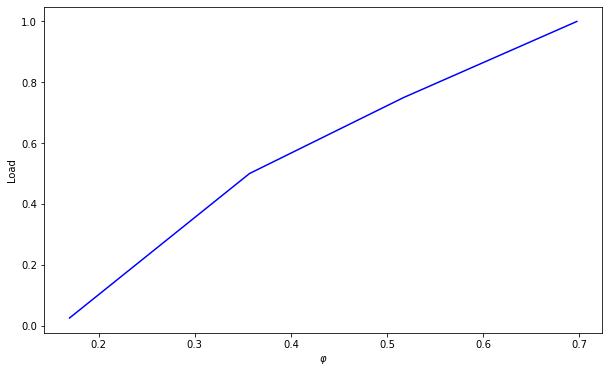

In [68]:
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.plot(phi_arr, load, color = 'blue')
ax1.set_xlabel(r'$\varphi$'), ax1.set_ylabel('Load')